# Chase Winslow

## What amateur teams have found the most success at producing NHL skaters and which are the best at producing goalies? 
These graphs will find which amateur teams and leagues have produced the best players. It will be interesting to if there are junior teams for each or if a team dominates both categories. I plan on looking at both all teams as well as 
excluding CHL teams to see which European and American have success. To find the best amateur teams for skaters, the games played and points of a player will be added together. Afterwards, to find the goalies score the games played and wins will be added together.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Loading and processing data into dfAma
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3

df = project_functions3.load_and_process("../data/raw/NHLDraft.csv")
df = df[df['Amateur Team'].notnull()]
df.head(25)

,Year,Position,Amateur Team,Games,Points,Goalie Wins,Score,Amateur League
225,2021,Defence,Michigan (Big Ten),8.0,3.0,NaN,11.0,NCAA
226,2021,Forward,Michigan (Big Ten),10.0,9.0,NaN,19.0,NCAA
227,2021,Forward,Peterborough Petes (OHL),9.0,3.0,NaN,12.0,OHL
229,2021,Forward,Michigan (Big Ten),9.0,3.0,NaN,12.0,NCAA
231,2021,Forward,Djurgardens IF (Sweden),9.0,4.0,NaN,13.0,SHL
235,2021,Forward,Sioux Falls Stampede (USHL),79.0,31.0,NaN,110.0,USHL
283,2021,Defence,EHC Biel-Bienne (Swiss),43.0,15.0,NaN,58.0,NL
448,2020,Forward,Rimouski Oceanic (QMJHL),135.0,52.0,NaN,187.0,QMJHL
449,2020,Forward,Sudbury Wolves (OHL),46.0,11.0,NaN,57.0,OHL
450,2020,Forward,Adler Mannheim (Germany),132.0,87.0,NaN,219.0,DEL


In [12]:
import os
# Export DataFrame to a .csv file
df.to_csv('../data/processed/processed_data_A3.csv', index=False)

# Check if the directory exists, and create it if it doesn't
if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')


In [13]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
plt.rc("axes.spines", top=False, right=False)


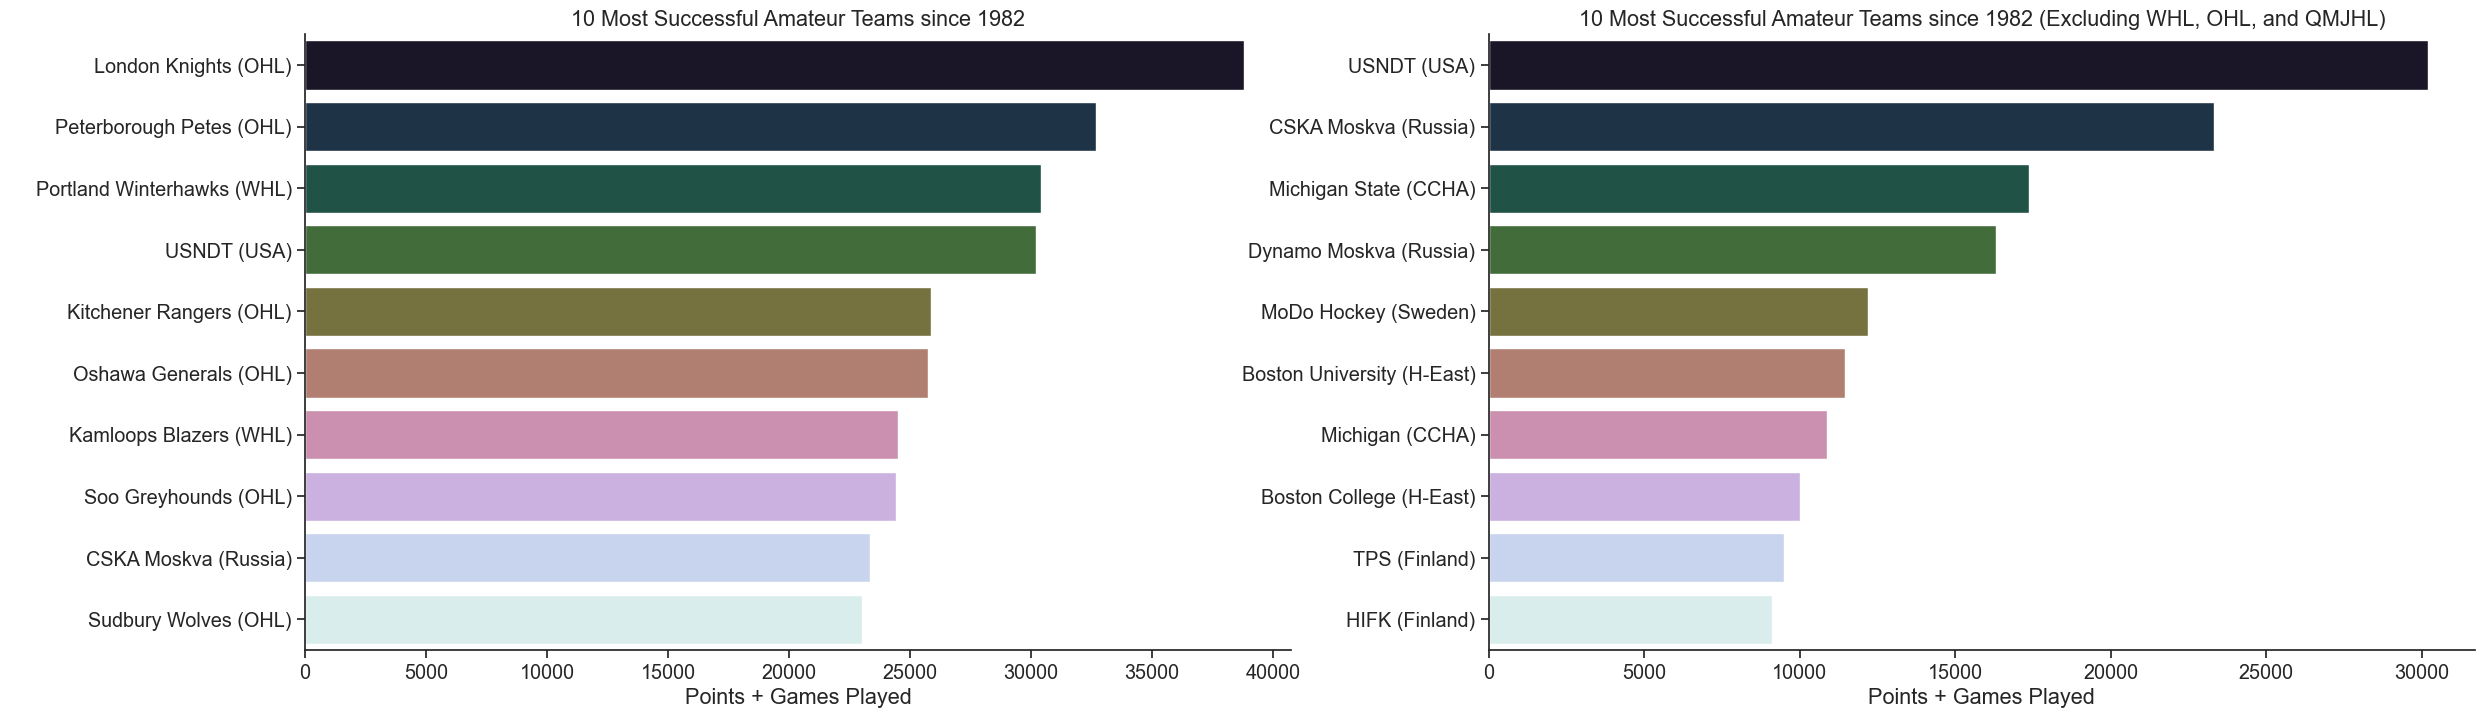

In [14]:
# Calculate total score for each team
df_scores = df.groupby('Amateur Team')[['Games', 'Points']].sum(numeric_only=False)
df_scores['Score'] = df_scores['Games'] + df_scores['Points']
df_scores = df_scores.sort_values('Score', ascending=False)[:10]
df_scores['Amateur Team'] = df_scores.index

# Set color palette
colors = sns.color_palette("cubehelix", len(df_scores), as_cmap=False)

# Create first subplot
fig, axs = plt.subplots(ncols=2, figsize=(28, 8))
ax1 = axs[0]
sns.barplot(x='Score', y='Amateur Team', data=df_scores, order=df_scores['Amateur Team'], palette=colors, ax=ax1)
ax1.set_title('10 Most Successful Amateur Teams since 1982')

ax1.set_xlabel('Points + Games Played')
ax1.set_ylabel(' ')

# Filter data to include only players with an amateur team and not from WHL, OHL or QMJHL
df_Europe = df[~df['Amateur Team'].str.contains('WHL|OHL|QMJHL')]

# Calculate total score for each team
df_Europe = df_Europe.groupby('Amateur Team').sum(numeric_only=True)[['Games', 'Points']]
df_Europe['Score'] = df_Europe['Games'] + df_Europe['Points']
df_Europe = df_Europe.sort_values('Score', ascending=False)[:10]
df_Europe['Amateur Team'] = df_Europe.index


# Create second subplot
ax2 = axs[1]
sns.barplot(x='Score', y='Amateur Team', data=df_Europe, order=df_Europe['Amateur Team'], palette=colors, ax=ax2)
ax2.set_title('10 Most Successful Amateur Teams since 1982 (Excluding WHL, OHL, and QMJHL)')
ax2.set_ylabel(' ')
ax2.set_xlabel('Points + Games Played')

# Show plot
plt.show()



This graph shows the most susscessful junior programs since 1982. There is a clear dominance of OHL teams at the top with 6 spots in the top 10. Both London and Peterborough and big leads on the teams below them. The US development team is 4th and is the only team outside of the CHL (Leagues in the CHL are WHL, OHL, & QMJHL) in the top 8. The first European team is CSKA Moskva which shows North America's clear production of great young prospects. 
Outside of North America, CSKA Moskva is the only European team in the top 10. After the teams start to average out and there is no clear country that dominates as the US, Finland, Sweden and Russia all have multiple teams listed. Those countries named are the best hockey nations in Europe and from this data it is clear why.

<Figure size 2000x1500 with 0 Axes>

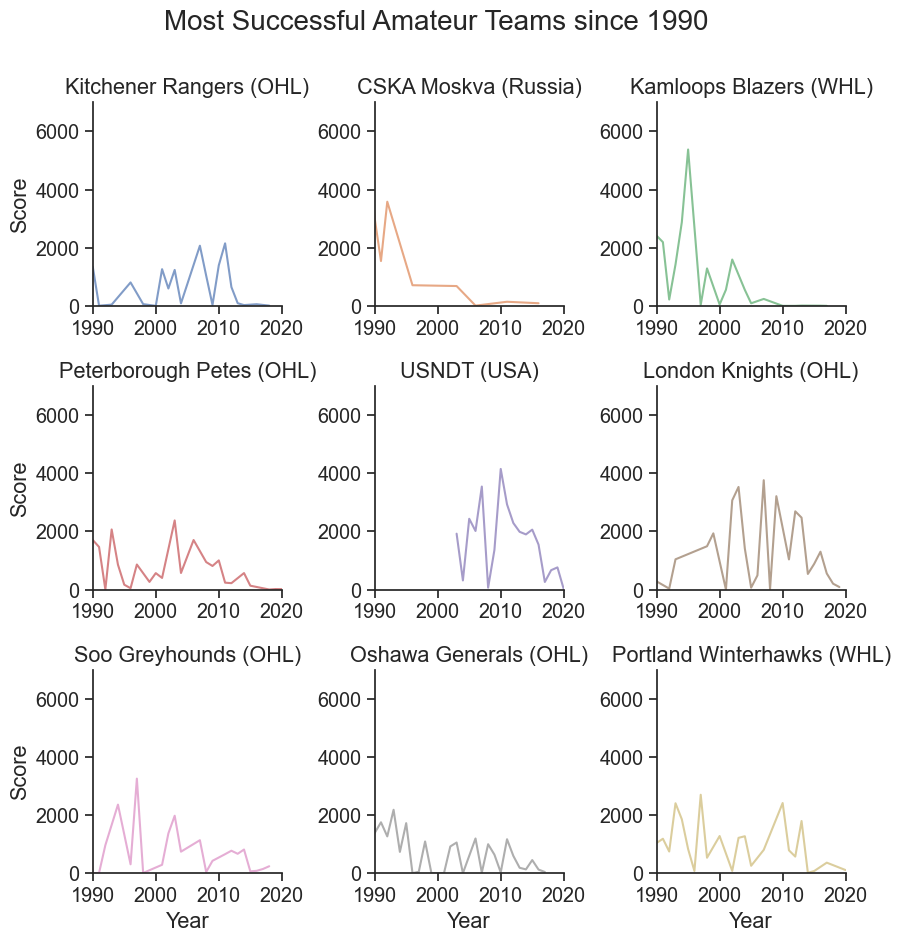

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Filter data to include only players with an amateur team
df_amateur2 = df[df['Amateur Team'].notnull()]

# Calculate total score for each team
df_scores2 = df_amateur2.groupby(['Amateur Team', 'Year'], as_index=False).sum()[['Amateur Team', 'Year', 'Games', 'Points']]
df_scores2['Score'] = df_scores2['Games'] + df_scores2['Points']
df_scores2 = df_scores2.sort_values(['Score'], ascending=False)

# Get top 9 teams based on score
top9_teams = df_scores2.groupby(['Amateur Team']).sum().sort_values(['Score'], ascending=False).head(9).index.tolist()

# Filter data to include only top 9 teams
df_scores2 = df_scores2[df_scores2['Amateur Team'].isin(top9_teams)]

# Set figure size
plt.figure(figsize=(20, 15))

# Generate plot using seaborn facet grid
g = sns.FacetGrid(df_scores2, col='Amateur Team', col_wrap=3, hue='Amateur Team', sharex=False, sharey=False)
g.map(sns.lineplot, 'Year', 'Score', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Score")
g.fig.suptitle("Most Successful Amateur Teams since 1990", fontsize=20, y=1.05)
g.set(xlim=(1990, 2020), ylim=(0, 7000))
plt.show()


This facet grid shows the top 9 teams since 1990 and how well they have done by year. Kamloops had a clear gold days of players in the mid-late 90s, however since then they haven't been able to replicate the success. Teams like Oshawa and Portland have been very consistent through the years. Looking at London's graph it is clear why they are the most successful as the maintain pushing out great players over the 30 year period. USNDT bursts onto the scene in the early 2000's and have dominated US junior hockey since.

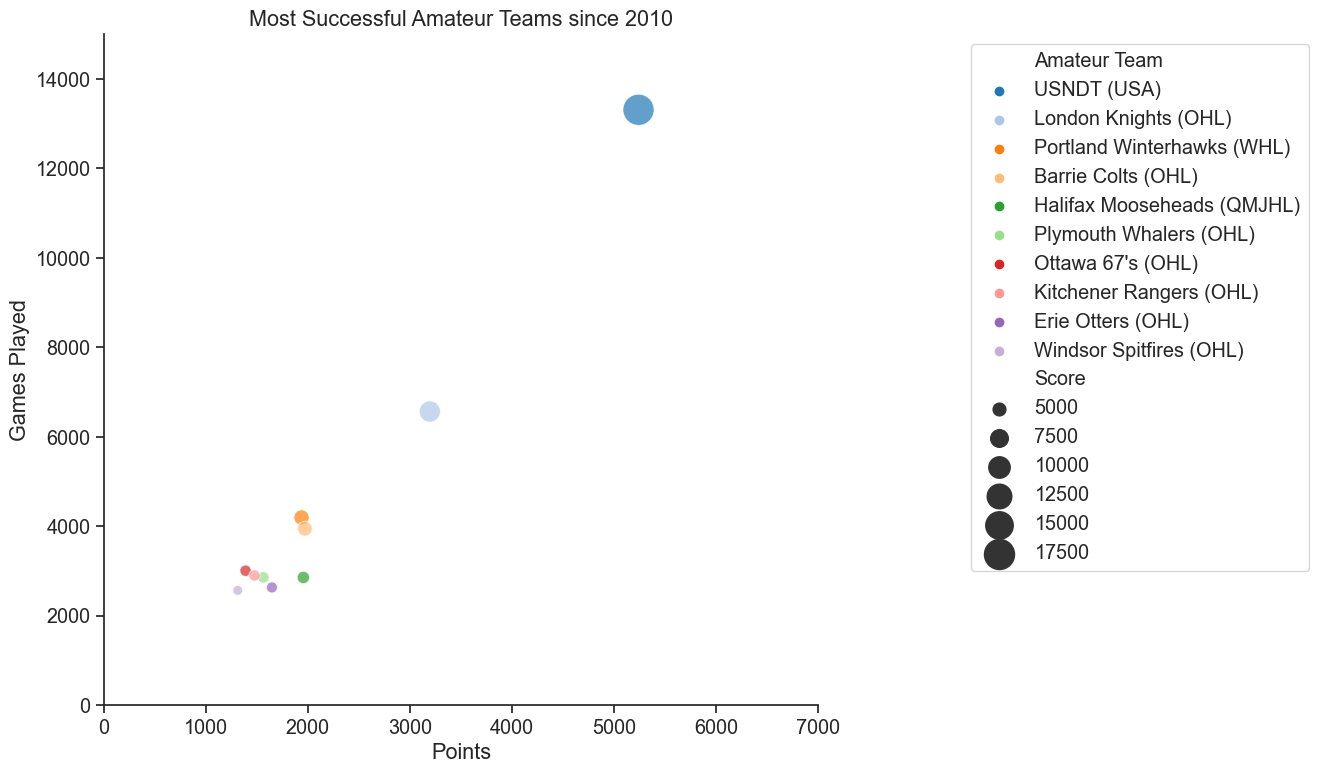

In [16]:
# Filter data for years 2010-2019
df2010 = df[df['Year'] >= 2010]

# Calculate total score for each team
df2010Sc = df2010.groupby('Amateur Team', as_index=False).agg({'Games': 'sum', 'Points': 'sum'})
df2010Sc['Score'] = df2010Sc['Games'] + df2010Sc['Points']
df2010Sc = df2010Sc.sort_values('Score', ascending=False).head(10)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Generate plot using seaborn
sns.scatterplot(x='Points', y='Games', size='Score', hue='Amateur Team', data=df2010Sc, sizes=(50, 500), alpha=0.7, palette='tab20', ax=ax, legend='brief')

# Add legend and adjust layout
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Most Successful Amateur Teams since 2010')
plt.ylabel('Games Played')
plt.xlabel('Points')
plt.xlim((0, 7000))
plt.ylim((0, 15000))
plt.tight_layout()
plt.show()




This graph shows the recent greatest of the USA Development team since 2010. When using data from 1982 the program was 4th, but since 2010 they have leapfrogged everyone by a huge margin. This is likely due to the increased interest in hockey in the US, as well as the fact for the US does not have the same system as Canada for young players. In Canada young players are drafted to a team in the WHL, OHL, or QMJHL depending on where they live. However, in the US the best young players can attend tryouts to play for the US Development team meaning the best young players almost always come from their team.

<Figure size 2000x2000 with 0 Axes>

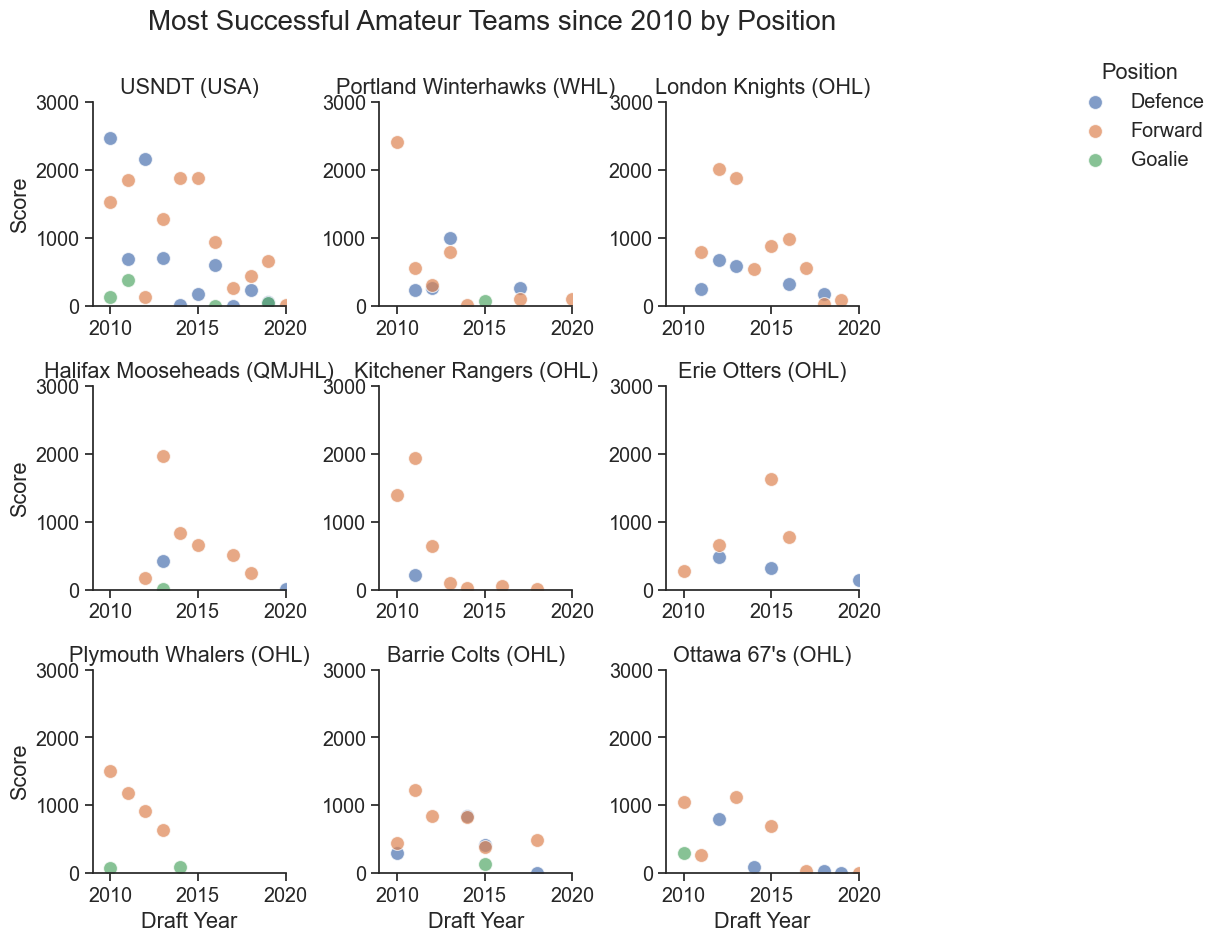

In [17]:
# Calculate total score for each team
df2010 = df2010.groupby(['Amateur Team', 'Year', 'Position'], as_index=False).sum()[['Amateur Team', 'Year', 'Position', 'Games', 'Points']]
df2010['Score'] = df2010['Games'] + df2010['Points']
df2010 = df2010.sort_values(['Score'], ascending=False)

# Get top 9 teams based on score
top2010 = df2010.groupby(['Amateur Team']).sum().sort_values(['Score'], ascending=False).head(9).index.tolist()

# Filter data to include only top 9 teams
df2010 = df2010[df2010['Amateur Team'].isin(top2010)]

# Set figure size
plt.figure(figsize=(20, 20))

# Generate plot using seaborn facet grid
g = sns.FacetGrid(df2010, col='Amateur Team', col_wrap=3, hue='Position', sharex=False, sharey=False)
g.map(sns.scatterplot, 'Year', 'Score', alpha=0.7, s=100)
g.set_titles("{col_name}")
g.set_axis_labels("Draft Year", "Score")
g.fig.suptitle("Most Successful Amateur Teams since 2010 by Position", fontsize=20, y=1.05)

g.add_legend(title='Position', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(xlim=(2009, 2020), ylim=(0, 3000))

plt.show()


These graphs show by position the most successful teams since 2010. This clearly shows why the USNDT has a major lead on the rest. Where most teams here have a handfull of decent foward talent and a few defence, the USNDT excels in all areas. They are also the only team in the top 9 to consistently push out goalie talent over the decade. 